In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [3]:
import pandas as pd

# load dataset
df = pd.read_csv("churn.csv")   # change path if needed

# show first 5 rows
df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.shape


(7043, 21)

In [5]:
df.info()
df.isnull().sum()
df.describe()
df.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [6]:
# convert target variable
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

df['Churn'].head()
# convert TotalCharges to numeric
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df.isnull().sum()
df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in df.select_dtypes(include='object').columns:
    df[col] = le.fit_transform(df[col])
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   int64  
 1   gender            7043 non-null   int64  
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   int64  
 4   Dependents        7043 non-null   int64  
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   int64  
 7   MultipleLines     7043 non-null   int64  
 8   InternetService   7043 non-null   int64  
 9   OnlineSecurity    7043 non-null   int64  
 10  OnlineBackup      7043 non-null   int64  
 11  DeviceProtection  7043 non-null   int64  
 12  TechSupport       7043 non-null   int64  
 13  StreamingTV       7043 non-null   int64  
 14  StreamingMovies   7043 non-null   int64  
 15  Contract          7043 non-null   int64  
 16  PaperlessBilling  7043 non-null   int64  


/tmp/ipython-input-3917600317.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)


In [7]:
# features (all columns except Churn)
X = df.drop('Churn', axis=1)

# target
y = df['Churn']


In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


In [9]:
X_train.shape, X_test.shape


((5634, 20), (1409, 20))

In [10]:
from sklearn.linear_model import LogisticRegression

# initialize model
lr = LogisticRegression(max_iter=1000)

# train model
lr.fit(X_train, y_train)


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

In [12]:
from sklearn.ensemble import RandomForestClassifier

# initialize model
rf = RandomForestClassifier(
    n_estimators=100,
    random_state=42
)

# train model
rf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [13]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Predictions
y_pred_lr = lr.predict(X_test)
y_pred_rf = rf.predict(X_test)

# Accuracy
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\n" + "-"*50)

# Confusion Matrix (Random Forest)
print("Confusion Matrix (Random Forest):")
print(confusion_matrix(y_test, y_pred_rf))
print("\n" + "-"*50)

# Classification Report (Random Forest)
print("Classification Report (Random Forest):")
print(classification_report(y_test, y_pred_rf))


Logistic Regression Accuracy: 0.7920511000709723
Random Forest Accuracy: 0.7877927608232789

--------------------------------------------------
Confusion Matrix (Random Forest):
[[925 110]
 [189 185]]

--------------------------------------------------
Classification Report (Random Forest):
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1035
           1       0.63      0.49      0.55       374

    accuracy                           0.79      1409
   macro avg       0.73      0.69      0.71      1409
weighted avg       0.78      0.79      0.78      1409



In [14]:
# Predict churn probability using Random Forest
churn_prob = rf.predict_proba(X_test)[:, 1]

# Create results dataframe
results = X_test.copy()
results['Actual_Churn'] = y_test.values
results['Churn_Probability'] = churn_prob

# Show top 10 high-risk customers
results.sort_values(by='Churn_Probability', ascending=False).head(10)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Actual_Churn,Churn_Probability
2927,3938,1,0,0,0,1,1,0,1,0,...,0,0,0,0,1,2,69.90,69.90,0,0.99
1144,573,1,0,0,0,1,0,1,0,0,...,0,0,2,0,1,2,35.55,35.55,1,0.99
6623,6516,1,1,0,0,1,1,2,1,0,...,0,0,0,0,1,2,76.45,76.45,1,0.98
6748,4419,0,1,0,0,1,1,0,1,0,...,0,0,2,0,1,2,85.00,85.00,1,0.97
2194,1724,1,0,0,0,1,1,0,1,0,...,0,2,0,0,1,2,79.50,79.50,1,0.97
809,1230,1,0,0,0,1,1,0,1,0,...,0,0,0,0,1,2,69.55,69.55,1,0.97
6633,3080,0,0,0,0,1,1,2,1,0,...,0,0,0,0,1,2,74.50,74.50,1,0.97
4678,2097,0,0,0,1,2,1,2,1,0,...,0,2,2,0,1,0,94.20,193.80,1,0.96
6190,1982,1,0,0,0,1,1,0,1,0,...,0,0,2,0,0,2,80.50,80.50,1,0.94
2493,6082,0,0,1,0,6,1,2,1,0,...,0,0,2,0,1,2,90.75,512.25,0,0.93


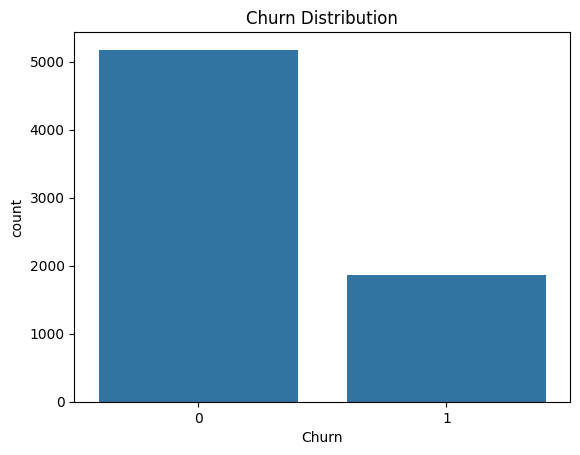

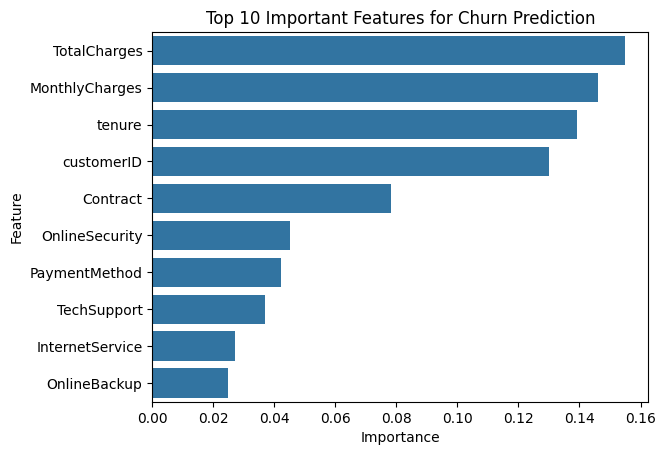

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# --- Churn Distribution ---
plt.figure()
sns.countplot(x=df['Churn'])
plt.title("Churn Distribution")
plt.show()

# --- Feature Importance from Random Forest ---
importances = rf.feature_importances_
feature_names = X.columns

importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

plt.figure()
sns.barplot(x='Importance', y='Feature', data=importance_df.head(10))
plt.title("Top 10 Important Features for Churn Prediction")
plt.show()


📊 Business Insights
Customers with month-to-month contracts have a significantly higher churn rate.
Higher monthly charges increase the probability of customer churn.
Customers with low tenure are more likely to leave the service.
Long-term contract customers show strong retention behavior.

💡 Business Recommendations
Offer discounts or loyalty benefits to month-to-month customers.
Encourage customers to switch to long-term contracts.
Provide special onboarding offers for new customers (low tenure).
Focus retention campaigns on customers with high churn probability.